<a href="https://colab.research.google.com/github/reubenbf/drug_data_analysis/blob/master/bigassdrugdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reuben Bernard Francis (45539979)

#Assignment 3 - Data Analysis

The following assignment is a data analysis on a dataset of **patient comments about drug effects**. The dataset has been generated from individual text files that were extracted from an online forum. The forum is associated with prescription medications used to treat depression.

##Approach

The following assignment has been approached only using **python** and its depending libraries. The given report and code has been created using a **jupyter notebook** converted from a ipynb file to html and later to pdf.

The **sas7bdat** file present in the SAS server was downloaded and converted to a **csv** file. 
The necessary charts have been produced using **matplotlib** library and wordcloud.

##Data Preprocessing 

Necessary libraries used to complete the project are present in the following block

In [2]:
import numpy as np
import pandas as pd
import operator

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk.corpus
from nltk.corpus import stopwords

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import itertools
import re
import collections

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 11,4


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Converting the sas7bdat file to csv 

In [3]:
!pip install sas7bdat
!sas7bdat_to_csv drug_reports.sas7bdat drug_report.csv

  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-cp36-none-any.whl size=16297 sha256=0b1e141ba0ba5e10450014eaa0dc17219cda30ac80cf71bf754ad387d79daa00
  Stored in directory: /root/.cache/pip/wheels/e0/b0/d2/5d251f0c159a251ec247d9d7f6db889b2c396b2f247a64e5c4
Successfully built sas7bdat
Traceback (most recent call last):
  File "/usr/local/bin/sas7bdat_to_csv", line 104, in <module>
    main(options, args)
  File "/usr/local/bin/sas7bdat_to_csv", line 40, in main
    with SAS7BDAT(in_files[i], log_level=log_level, **opts) as f:
  File "/usr/local/lib/python3.6/dist-packages/sas7bdat.py", line 349, in __init__
    self._file = fh or open(self.path, 'rb')
  File "/usr/lib/python3.6/codecs.py", line 897, in open
    file = builtins.open(filename, mode, buffering)
FileNotFoundError: [Errno 2] No such file or directory: 'drug_reports.sas7bdat'


Creating **drug_report dataframe** that holds **necessary patient comments** from the csv file. Reading the text sample files for medication and side effect.

In [0]:
drug_report = pd.read_csv('drug_report.csv')
drug_report = pd.DataFrame(drug_report)
with open('MedicationConcept.txt', 'r') as file:
    Meds = file.readlines()
with open('SideEffectsConcept.txt', 'r') as file:
    SideEffect = file.readlines()

Meds = [line.replace('\n','').replace('CLASSIFIER:','') for line in Meds]
SideEffect = [line.replace('\n','').replace('CLASSIFIER:','') for line in SideEffect]

Updating **Meds** column to the drug_report dataframe. This column holds information of the medication mentioned by each patient

In [0]:
Meds_report = [[med for med in Meds if med.lower() in sentence.lower()] for sentence in drug_report['DrugReport']]
drug_report['Meds'] = Meds_report

Updating **SideEffect** column to the drug_report dataframe. This column holds the information of the side effects mentioned by the patient. 

In [0]:
#make the sideeffect list with no stopwords and split them
SideEffect_list = [se.lower().replace(' of','').replace(' the','').replace(' in','').replace('sleeplessness','sleep').split() for se in SideEffect]

#compare with each term and return if present in sentence, empty if not
SideEffect_report = [[[SideEffect[count] for s in se if all(a in sentence.lower() for a in s.split())] for count,se in enumerate(SideEffect_list)] for sentence in drug_report['DrugReport']]

#remove duplicates and also empty lists
SideEffect_report = [[x for i, x in enumerate(se) if i == se.index(x)] for se in [list(itertools.chain(*se)) for se in SideEffect_report]]

drug_report['SideEffect'] = SideEffect_report

Updating Dosage column to the drug_report by using the given regular expression present in the dosage sample text. This helps identify the dosage mentioned in each of the patient comment

In [0]:
Dosage_report = [re.findall('([\d]+\s?mg\.?)|[0-9]+[\.][0-9]+\s?mg\.?', sentence.lower()) for sentence in drug_report['DrugReport']]

drug_report['Dosage'] = Dosage_report

#Task 1

Plotting a barchart that shows the number of documents that contain a medication, number of documents that contain dosage, and the number of documents that contain a side effect.

##Bar Chart

The task is fairly simple now that the drug_report dataframe has pre-processed the data. We find the count of each of the following columns (medication, side effect and dosage) that isn't empty, iterating through every patient comment.

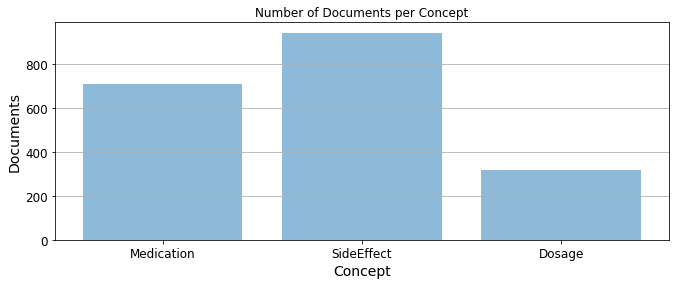

In [8]:
objects = ('Medication', 'SideEffect', 'Dosage')
y_pos = np.arange(len(objects))
docs = [len([meds for meds in drug_report['Meds'] if meds]),
        len([se for se in drug_report['SideEffect'] if se]),
        len([dos for dos in drug_report['Dosage'] if dos])]

plt.bar(y_pos, docs, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Concept')
plt.ylabel('Documents')
plt.title('Number of Documents per Concept')
plt.grid(axis='y')
plt.show()


The bar chart shows the count of documents for each concept. Medication used has been mentioned in about 710 documents. Slights higher are the side effects mentioned in 945 comments. The lowest from the three is the dosage, present in about 318 documents.

#Task 2

Displaying the counts of number of documents that mention Abidal, Cenerol, Ecstapin, Fortifex, Prexifan

##Horizontal Bar Chart

We search for the specified words in the Meds column and store them in individual variables. Plotting these values using matplotlib gives us a horizontal bar chart that specifies count in descending order.

In [0]:
abi,cen,ecs,fort,pre=[],[],[],[],[]
for count in range(len(drug_report)):
  abi.append('Abidal' in drug_report['Meds'][count])
  cen.append('Cenerol' in drug_report['Meds'][count])
  ecs.append('Ecstapin' in drug_report['Meds'][count])
  fort.append('Fortifex' in drug_report['Meds'][count])
  pre.append('Prexifan' in drug_report['Meds'][count])

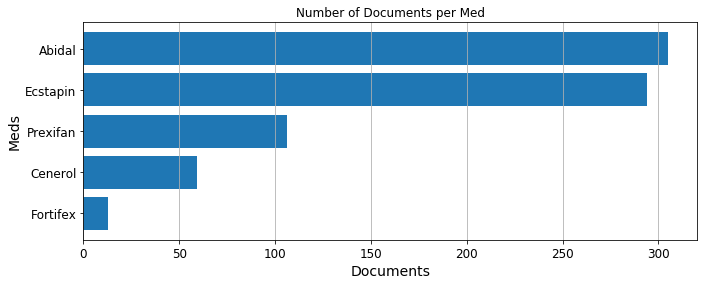

In [10]:
Med = ('Abidal', 'Ecstapin', 'Prexifan', 'Cenerol', 'Fortifex')
y_pos = np.arange(len(Med))
docs= [sum(abi),sum(ecs),sum(pre),sum(cen),sum(fort)]

fig, ax = plt.subplots()

ax.barh(y_pos, docs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Med)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Documents')
ax.set_ylabel('Meds')
ax.set_title('Number of Documents per Med')
plt.grid(axis='x')
plt.show()

The horizontal bar graph represents the count of medication mentioned in each of the patients comment. Abidal has been mentioned about in about 305, slightly less than that is Ecstapin mentioned in 294 documents. Close to less than half of that is Prexifan mentioned 106 times. Cenerol follows by being mentioned in 59 documents and lastly Fortifex in 13 documents. 

#Task 3

Identifying the medications that are associated with sleep issues, how strongly they're associationed with sleep issues, and quantifying the degree of association

The following code searches for the SideEffect 'Sleeplessness' across the drug_report dataframe and returns the Medications being mentioned. 

The frequency of each of the medication mentioned and the name of the medication itself are saved in a different dataframe

In [0]:
inso, nightm, sleep = [],[],[]
sleep.append([drug_report['Meds'][count] for count in range(len(drug_report)) if 'Sleeplessness' in drug_report['SideEffect'][count]])
inso.append([drug_report['Meds'][count] for count in range(len(drug_report)) if 'Insomnia' in drug_report['SideEffect'][count]])
nightm.append([drug_report['Meds'][count] for count in range(len(drug_report)) if 'Nightmares' in drug_report['SideEffect'][count]])

sleepless = collections.Counter(list(itertools.chain(*list(itertools.chain(*sleep)))))
insomnia = collections.Counter(list(itertools.chain(*list(itertools.chain(*inso)))))
nightmares = collections.Counter(list(itertools.chain(*list(itertools.chain(*nightm)))))
sleep_issues = sleepless + insomnia + nightmares

temp = {'Meds':list(sleep_issues.keys()),'Frequency':list(sleep_issues.values())}
sleep_df = pd.DataFrame.from_dict(temp).sort_values('Frequency',ascending=False)

sleep_df['Percentage'] = sleepless_df.Frequency*100/sum(sleepless_df.Frequency)

##Horizontal Bar Chart

Plotting a horizontal barchart of the new dataframe gives an idea of what medications are associated to sleep issues. 

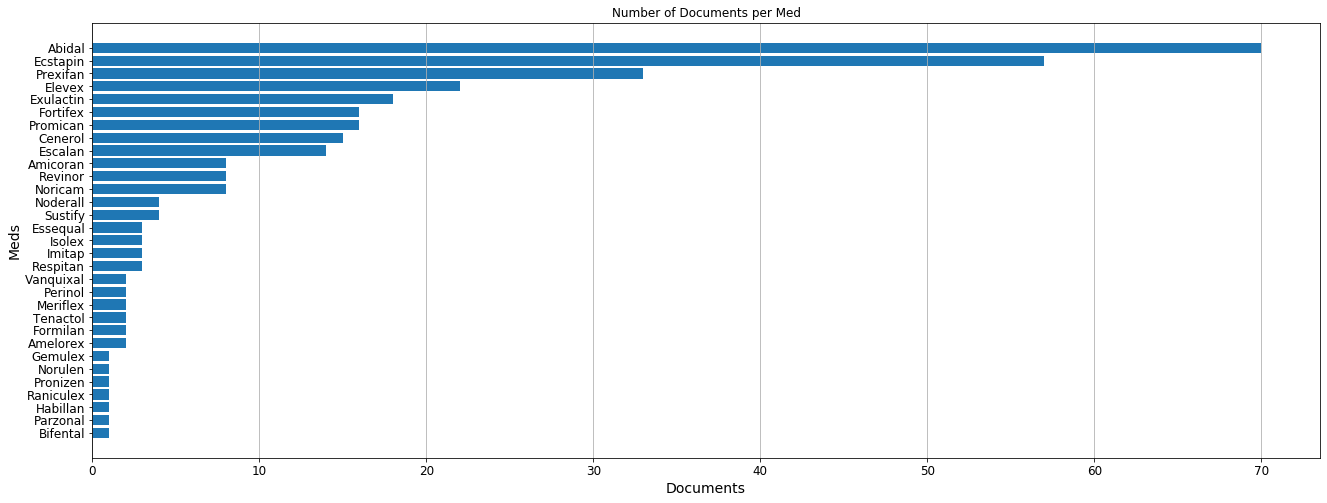

In [30]:
Med = sleep_df['Meds']
y_pos = np.arange(len(Med))
docs= sleep_df['Frequency']

fig, ax = plt.subplots(figsize = (22,8))

ax.barh(y_pos, docs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Med)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Documents')
ax.set_ylabel('Meds')
ax.set_title('Number of Documents per Med')
plt.grid(axis='x')
plt.show()

Quite noticable that Abidol, Ecstapin and Prexifan are the top three meds associated with sleep issues 

##Degree of Association

We can understand the degree of association using percentages of the frequency of a mediation. Therefore in the following table, Abidal has 20% association with sleeplessness while Ecstapin has 17.02% contribution to sleeplessness.

In [31]:
sleep_df[['Meds','Percentage']].head(5)

,Meds,Percentage
2,Abidal,20.000000
11,Ecstapin,17.021277
1,Prexifan,11.063830
6,Elevex,6.382979
14,Exulactin,6.382979


###Pie Chart

Simple visual representation of the different medications that contribute to sleeplessness can be understood as a pie chart. The smaller categories have been clubbed as "Others"

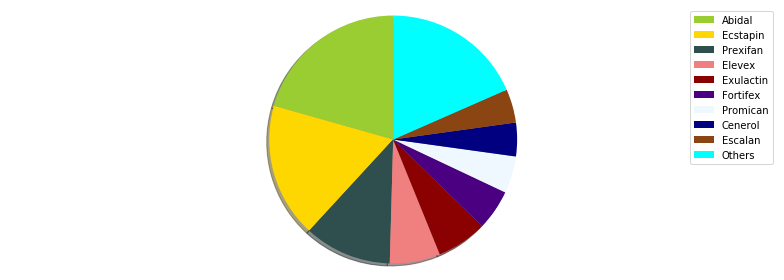

In [32]:
labels = list(sleep_df['Meds'][:9])
labels.append('Others')
sizes = list(sleep_df['Percentage'][:9])
sizes.append(sum(sleep_df['Percentage'][10:]))

colors = ['yellowgreen', 'gold', 'darkslategrey', 'lightcoral','darkred','indigo','aliceblue','navy','saddlebrown','cyan']
patches, texts = plt.pie(sizes,colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#Task 4

Describing the main concerns expressed in the posts

Understanding a main concern usually implies having to find a common result potrayed by all the comments posted by the patients. 
The first step was to summarized the comments so as to remove unwanted words by using a word tokenizer and lemmatizer. A new column called the Summarized is pushed to the drug_report dataframe

In [0]:
a = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

token,stop=[],[]
for count in range(drug_report.shape[0]):
  token.append(word_tokenize(drug_report['DrugReport'][count]))
  for count1 in range(len(token[count])):
    token[count][count1] = lemmatizer.lemmatize(token[count][count1])
  stop.append([x for x in token[count] if x not in a])
drug_report['Summarized'] = stop

##Word Frequency

Having found the summary of each of the comments. This could help us get a good idea of the word frequeny being used as a whole. Just like the sleeplessness, a new dataframe can be created that has the word and the frequency of that word across all documents. 

In [34]:
words = [sum for sum in drug_report['Summarized']]
words_flatten = collections.Counter([wf for wf in list(itertools.chain(*words)) if len(wf) > 3])
temp = {'Words':list(words_flatten.keys()),'Frequency':list(words_flatten.values())}
word_freq = pd.DataFrame.from_dict(temp).sort_values('Frequency',ascending=False)
word_freq.head(10)

,Words,Frequency
27,depression,582
278,drug,489
5,year,485
133,effect,473
142,taking,464
132,side,434
1,medication,431
124,feel,361
113,take,359
103,Abidal,332


The word depression occurs 582 times, word side and effect appear around 430 times while Abidal is almost lose with 332. Even words like anxiety is quite high with a count of 211 and medication like Ecstapin with a count of 299 being second after Abidal. Word like help appears 206 times which is also an interest of concern. These numbers however can be viewed better visually.

###Wordcloud

The wordcloud gives us a muh better visual idea of the top most frequent words being present in all the documents. Just iterating through all the DrugReport comments and passing it to the WordCloud() function generate() gives up a wordcloud when displayed using the matplotlib library

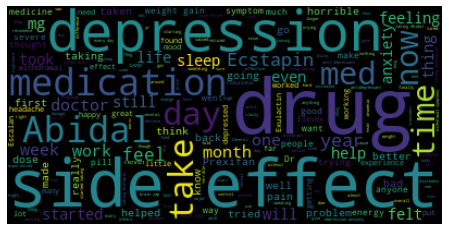

In [35]:
text = ' '.join(list(drug_report.DrugReport))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above wordcloud gives a much better perspective of the most frequent words being used. Our major concerns are words like '**depression**', 'side effect', 'Abidal', '**help**', '**anxiety**', '**sleep problem**'

#Task 5

Providing additional charts that would help the analyst find additional useful information about drug effects on patients

A Sentiment Analysis could be performed that helps truely understand the concerns of the patients. Checking on the count of positive and negative comments and realizing the true effect of mediation

In [36]:
from nltk.sentiment import vader
!pip install --upgrade vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


     |████████████████████████████████| 133kB 2.2MB/s 


The vaderSentiment is used to find the sentiment of each of the comments. Being either negative or positive, the notations are saved in another column of the drug_report dataframe called the Sentiment.  

In [0]:
vs={}
for count in range(drug_report.shape[0]):
    vs[count] = analyzer.polarity_scores(drug_report['DrugReport'][count])
    del vs[count]['neu']
    del vs[count]['compound']

senti = [max(vs[cou].items(), key=operator.itemgetter(1))[0] for cou in vs]
drug_report['Sentiment'] = senti

##Bar Chart

This is a simple bar chart that shows the ount of documents that have a positive or a negative sentiment

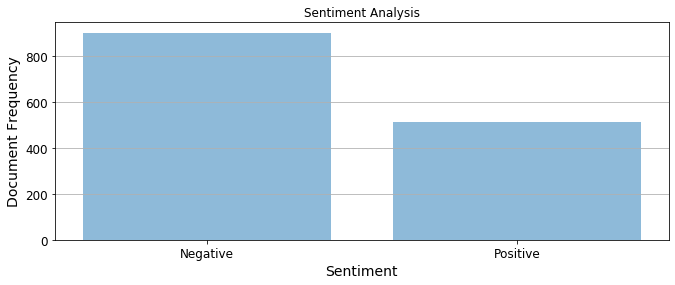

In [38]:
objects = ('Negative', 'Positive')
y_pos = np.arange(len(objects))
freq = [drug_report['Sentiment'].value_counts()[0],drug_report['Sentiment'].value_counts()[1]]

plt.bar(y_pos, freq, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Sentiment')
plt.ylabel('Document Frequency')
plt.title('Sentiment Analysis')
plt.grid(axis='y')
plt.show()


We notice that 902 documents are negatively noted while the rest 512 are positive. 

Futher we notice that if we find the count of dosage seperately pos positive and negative notated comments. The dosage used on negative comments are higher than the dosage used in positive comments

In [0]:
pos_senti=[]
pos_senti.append([drug_report['Dosage'][count] for count in range(len(drug_report)) if 'pos' in drug_report['Sentiment'][count]])
pos_dos = [item.replace(" ","").replace(".","") for item in list(itertools.chain(*list(itertools.chain(*pos_senti))))]
pos_dos = collections.Counter(pos_dos)
temp = {'Dosage':list(pos_dos.keys()),'Frequency':list(pos_dos.values())}
pos_dosage = pd.DataFrame.from_dict(temp).sort_values('Frequency',ascending=False)

neg_senti=[]
neg_senti.append([drug_report['Dosage'][count] for count in range(len(drug_report)) if 'neg' in drug_report['Sentiment'][count]])
neg_dos = [item.replace(" ","").replace(".","") for item in list(itertools.chain(*list(itertools.chain(*neg_senti))))]
neg_dos = collections.Counter(neg_dos)
temp = {'Dosage':list(neg_dos.keys()),'Frequency':list(neg_dos.values())}
neg_dosage = pd.DataFrame.from_dict(temp).sort_values('Frequency',ascending=False)

Frequency of dosage for positive comments

In [68]:
pos_dosage.head(5)

,Dosage,Frequency
9,60mg,37
6,150mg,22
23,75mg,22
15,30mg,17
14,,16


Frequency of dosage for negative comments

In [67]:
neg_dosage.head(5)

,Dosage,Frequency
7,150mg,45
21,75mg,44
15,60mg,40
17,30mg,36
5,,20


Here the 150mg is present in 45 documents (highest count) from negative comments 
while
60mg is present in 37 documents (highest count) from positive comments 

In [69]:
!jupyter nbconvert --to html bigassdrugdata.ipynb  #need to upload the ipynb file after downloading it 

[NbConvertApp] Converting notebook bigassdrugdata.ipynb to html
[NbConvertApp] Writing 633173 bytes to bigassdrugdata.html
